### Import all the required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read the csv file
emission = pd.read_csv(".\cleaned_data\cleaned join tables/Cleaned_join_em_sub_data.csv")

In [3]:
# Get the top five records of data
emission.head()

,report_id,report_year,facility_id,jurisdiction_code,jurisdiction_facility_id,facility_name,registered_business_name,primary_anzsic_class_code,primary_anzsic_class_name,substance_id,...,cat2a,cat2b,cat3,voc,c1_substance_use_threshold_kg,emissions_to_air,emissions_to_water,emissions_to_land,fact_sheet_url,first_reporting_year
0,525732,2020,516654,SA,SA0152,YALDARA ESTATE,1847 WINERY (SA) PTY LTD,1214,Wine and Other Alcoholic Beverage Manufacturing,37,...,False,False,False,True,10000.0,True,True,True,http://www.npi.gov.au/substances/ethanol/index...,2001
1,525732,2020,516654,SA,SA0152,YALDARA ESTATE,1847 WINERY (SA) PTY LTD,1214,Wine and Other Alcoholic Beverage Manufacturing,85,...,True,True,False,False,25000.0,True,False,False,http://www.npi.gov.au/substances/volatile-orga...,2001
2,524380,2020,545702,WA,WA0685,3 Oceans Wine Company,3 OCEANS WINE COMPANY PTY LTD,1214,Wine and Other Alcoholic Beverage Manufacturing,37,...,False,False,False,True,10000.0,True,True,True,http://www.npi.gov.au/substances/ethanol/index...,2001
3,524380,2020,545702,WA,WA0685,3 Oceans Wine Company,3 OCEANS WINE COMPANY PTY LTD,1214,Wine and Other Alcoholic Beverage Manufacturing,85,...,True,True,False,False,25000.0,True,False,False,http://www.npi.gov.au/substances/volatile-orga...,2001
4,526218,2020,658102,NSW,1538,4 Pines Brewing Brookvale,4 PINES BREWING COMPANY WHOLESALE PTY LTD,1212,Beer Manufacturing,37,...,False,False,False,True,10000.0,True,True,True,http://www.npi.gov.au/substances/ethanol/index...,2001


In [4]:
## Check the shape
emission.shape

(830263, 37)

In [5]:
# Chech the datatypes 
emission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830263 entries, 0 to 830262
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   report_id                      830263 non-null  int64  
 1   report_year                    830263 non-null  int64  
 2   facility_id                    830263 non-null  int64  
 3   jurisdiction_code              830263 non-null  object 
 4   jurisdiction_facility_id       830263 non-null  object 
 5   facility_name                  830263 non-null  object 
 6   registered_business_name       824021 non-null  object 
 7   primary_anzsic_class_code      830263 non-null  int64  
 8   primary_anzsic_class_name      830263 non-null  object 
 9   substance_id                   830263 non-null  int64  
 10  substance_sort_order           830263 non-null  int64  
 11  substance_name_x               830263 non-null  object 
 12  air_point_emission_kg         

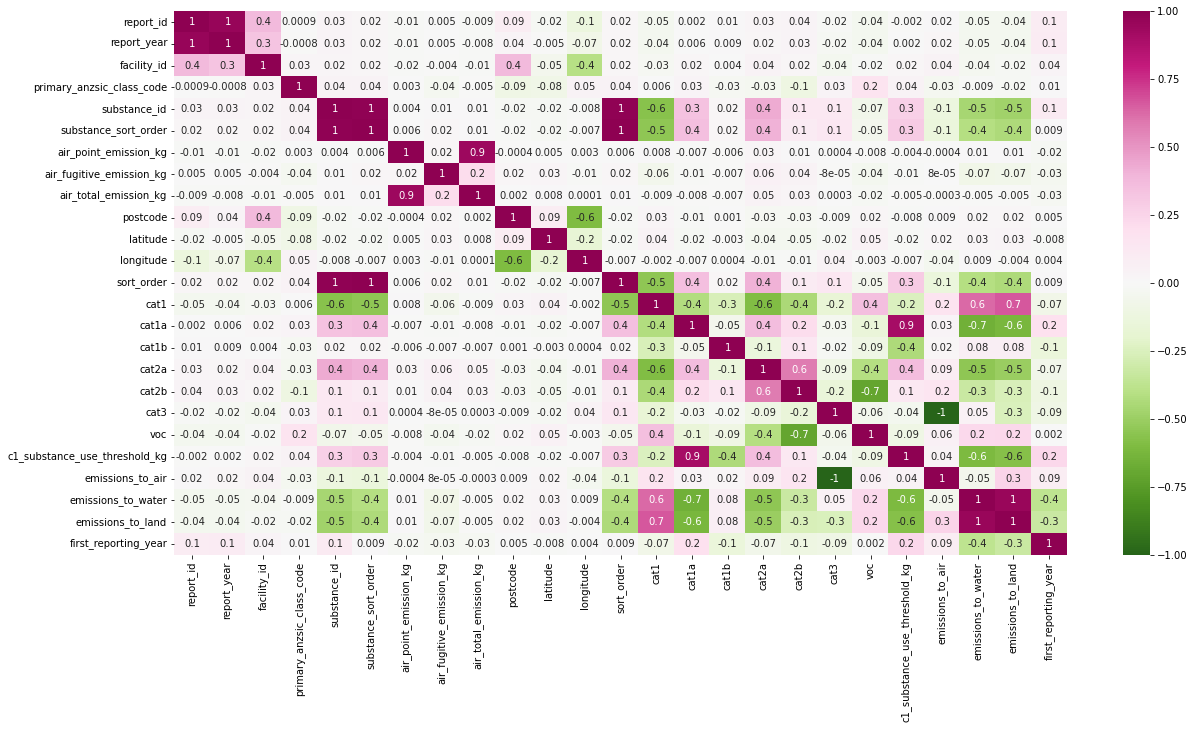

In [6]:
# Visualize correlation matrix in Seaborn using a heat map.
f = plt.figure(figsize=(20, 10))
sns.heatmap(emission.corr(), annot=True, fmt= '.1g', annot_kws={'size':'10'},cmap ='PiYG_r');

**It shows that there is strong relation between substances belongs to cat1, cat1a and cat1b with emission_water, emmision_to_land. And c1_substance_use_threshold_kg and voc with cat1**

In [6]:
# How many columns in data
emission.columns

Index(['report_id', 'report_year', 'facility_id', 'jurisdiction_code',
       'jurisdiction_facility_id', 'facility_name', 'registered_business_name',
       'primary_anzsic_class_code', 'primary_anzsic_class_name',
       'substance_id', 'substance_sort_order', 'substance_name_x',
       'air_point_emission_kg', 'air_fugitive_emission_kg',
       'air_total_emission_kg', 'suburb', 'state', 'postcode', 'latitude',
       'longitude', 'pivot_facility_name', 'sort_order', 'substance_name_y',
       'cas_registry_numbers', 'cat1', 'cat1a', 'cat1b', 'cat2a', 'cat2b',
       'cat3', 'voc', 'c1_substance_use_threshold_kg', 'emissions_to_air',
       'emissions_to_water', 'emissions_to_land', 'fact_sheet_url',
       'first_reporting_year'],
      dtype='object')

In [7]:
# How many values in each state column
emission.state.value_counts()

QLD    216920
WA     168905
VIC    158633
NSW    151745
SA      68781
TAS     32118
NT      27282
ACT      5879
Name: state, dtype: int64

In [8]:
type(emission.state)

pandas.core.series.Series

In [9]:
# label Encoding
import sklearn
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

l_col =['suburb', 'state','jurisdiction_code']

label_encoder.fit(emission[l_col].values.flatten())

emission[l_col]=emission[l_col].apply(label_encoder.fit_transform)


In [10]:
## Mapping of state column with encoded state data
state_lst = ['QLD','WA', 'VIC','NSW','SA', 'TAS','NT','ACT']
encoded_data, mapping_index = pd.Series(state_lst).factorize()
print('mapping_index :', mapping_index)
print('encoded_data :', encoded_data)

mapping_index : Index(['QLD', 'WA', 'VIC', 'NSW', 'SA', 'TAS', 'NT', 'ACT'], dtype='object')
encoded_data : [0 1 2 3 4 5 6 7]


In [11]:
# OneHot Encoding 
emission_dummies = pd.get_dummies(data=emission,
                                   columns=['cat1', 'cat1a', 'cat1b', 'cat2a', 'cat2b',
                                        'cat3', 'voc', 'emissions_to_air', 'emissions_to_water',
                                                     'emissions_to_land'],
                                   drop_first=False)


In [12]:
## Drop the first columns of dummies data
emission_dummies.drop(['cat1_True', 'cat1a_True','cat1b_True', 'cat2a_True',
                      'cat2b_True', 'cat3_True', 'voc_True', 'emissions_to_air_True',
                      'emissions_to_water_True', 'emissions_to_land_True'],axis=1,inplace=True)

In [13]:
## Concatination of label encoded data set with main data with dummies
data_frames = [emission_dummies, emission[l_col]]
emission_data = pd.concat(data_frames)

In [25]:
## total columns in final dataframe
emission_data.columns

Index(['report_id', 'report_year', 'facility_id', 'jurisdiction_code',
       'jurisdiction_facility_id', 'facility_name', 'registered_business_name',
       'primary_anzsic_class_code', 'primary_anzsic_class_name',
       'substance_id', 'substance_sort_order', 'substance_name_x',
       'air_point_emission_kg', 'air_fugitive_emission_kg',
       'air_total_emission_kg', 'suburb', 'state', 'postcode', 'latitude',
       'longitude', 'pivot_facility_name', 'sort_order', 'substance_name_y',
       'cas_registry_numbers', 'c1_substance_use_threshold_kg',
       'fact_sheet_url', 'first_reporting_year', 'cat1_False', 'cat1a_False',
       'cat1b_False', 'cat2a_False', 'cat2b_False', 'cat3_False', 'voc_False',
       'emissions_to_air_False', 'emissions_to_water_False',
       'emissions_to_land_False'],
      dtype='object')

In [44]:
## Drop any null values from dataset
emission_data.dropna(how='any', inplace=True)

In [45]:
# Get the shape
emission_data.shape

(577401, 37)

In [67]:
# Choose the features for model training
feature_columns = ['report_year', 'jurisdiction_code',
       'primary_anzsic_class_code', 'substance_id', 'air_point_emission_kg', 'air_fugitive_emission_kg',
      'suburb', 'c1_substance_use_threshold_kg',
    'first_reporting_year', 'cat1_False', 'cat1a_False','state',
       'cat1b_False', 'cat2a_False', 'cat2b_False', 'cat3_False', 'voc_False',
       'emissions_to_air_False', 'emissions_to_water_False',
       'emissions_to_land_False']

### Created  `X_train`, `X_test`, `y_train` and `y_test` variables using the features 

In [68]:
# Split the data into test and train dataset
X = emission_data[feature_columns]
y = emission_data['air_total_emission_kg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=101)

In [69]:
# shape of train and test dataset
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(375310, 20)
(202091, 20)
(375310,)
(202091,)


### Train a model on the training data

In [70]:
# Import linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [71]:
# Fit the train data to model
model.fit(X_train, y_train)

LinearRegression()

In [75]:
# get the predictions
y_pred = model.predict(X_test)

In [76]:
# Get the r2 score
r2_score(y_test, y_pred)

0.8097391665133682

Text(0.5, 1.0, 'Actual vs. Predicted')

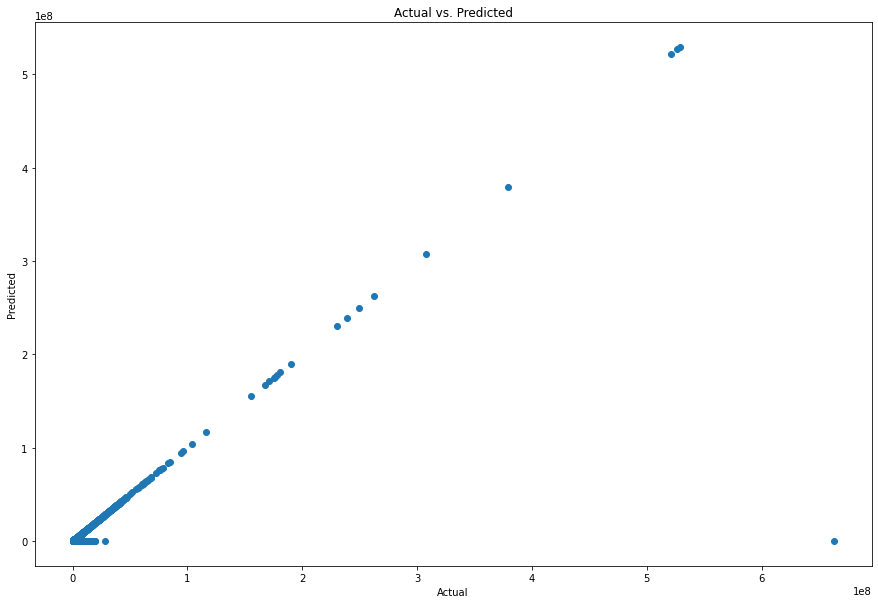

In [77]:
#Plot the actual and prediction results
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted")

In [78]:
# Find the difference between actual and predited data set
pred_y_df = pd.DataFrame({"Actual Value":y_test, "Predicted Value":y_pred, "Difference": y_test-y_pred})
pred_y_df.head()

,Actual Value,Predicted Value,Difference
165791,10.667200,-11267.046816,11277.714016
32922,112075.610000,111735.344030,340.265970
595817,0.710000,-17478.037759,17478.747759
269415,97.884648,-22418.772168,22516.656816
701986,0.001000,63165.799200,-63165.798200
